## Linear Regression - I

In [1]:
import numpy as np
import pandas as pd

from scipy.optimize import minimize
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dat = { 'Hydrocarbon level' : [0.99,1.02,1.15,1.29,1.46,1.36,0.87,0.123,1.55,1.4],
'O2' : [90.01,89.05,91.43,93.74,96.73,94.45,87.59,91.77,99.42,93.65]
      }
data = pd.DataFrame(dat)

data

,Hydrocarbon level,O2
0,0.990,90.01
1,1.020,89.05
2,1.150,91.43
3,1.290,93.74
4,1.460,96.73
5,1.360,94.45
6,0.870,87.59
7,0.123,91.77
8,1.550,99.42
9,1.400,93.65


C:\Users\amilk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


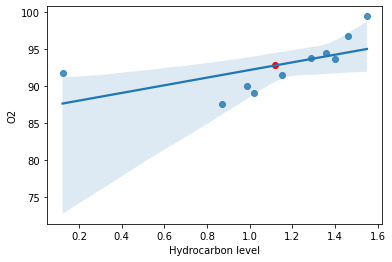

In [3]:
x = data['Hydrocarbon level']
y = data['O2']

plt.figure()
sns.regplot(x,y,fit_reg = True)
plt.scatter(np.mean(x),np.mean(y),color = 'red')

##  Linear Regression - II

In [4]:

import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression

In [5]:
tv_ads = [1,3,2,1,3]
car_sold = [14,24,18,17,27]

tbl = pd.DataFrame(list(zip(tv_ads, car_sold)), columns =['tv_ads', 'car_sold'])
tbl

,tv_ads,car_sold
0,1,14
1,3,24
2,2,18
3,1,17
4,3,27


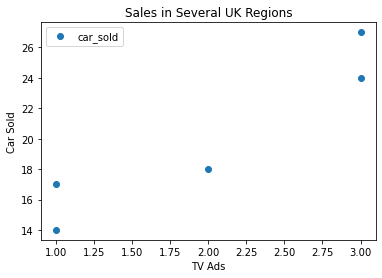

In [6]:
tbl.plot('tv_ads','car_sold', style = 'o')
plt.ylabel("Car Sold")
plt.xlabel("TV Ads")
plt.title('Sales in Several UK Regions')
plt.show()

In [7]:
t = tbl['tv_ads']
c = tbl['car_sold']

In [10]:
import statsmodels.api as s

t = s.add_constant(t)
model1 = sm.OLS(c,t)

result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:               car_sold   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     21.43
Date:                Sat, 12 Mar 2022   Prob (F-statistic):             0.0190
Time:                        22:32:46   Log-Likelihood:                -9.6687
No. Observations:                   5   AIC:                             23.34
Df Residuals:                       3   BIC:                             22.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000      2.366      4.226      0.0

C:\Users\amilk\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


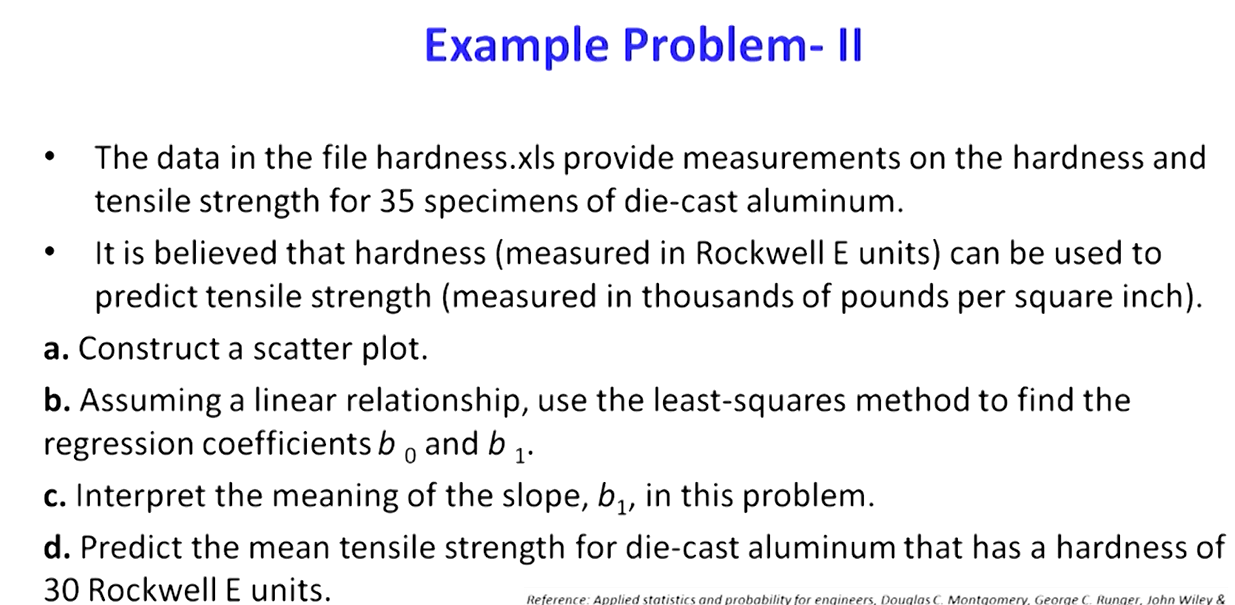

In [11]:
tensile = [53.0,70.2,84.3,55.3,78.5,63.5,71.4,53.4,82.5,67.3,69.5,73.0,55.7,85.8,95.4,51.1,74.4,54.1,77.8,52.4,69.1,53.5,64.3,
           82.7,55.7,70.5,87.5,50.7,72.3,59.5,71.3,52.7,76.5,63.7,69.2]

hardness = [29.31,34.86,36.82,30.12,34.02,30.82,35.40,31.26,32.18,33.42,37.69,34.88,24.66,34.76,38.02,25.68,25.81,26.46,28.67,24.64,25.77,
            23.69,28.65,32.38,23.21,34.00,34.47,29.25,28.71,29.83,29.25,27.99,31.85,27.65,31.70]

In [12]:
data = pd.DataFrame(list(zip(tensile, hardness)), columns =['Tensile strength', 'Hardness'])
data.head()

,Tensile strength,Hardness
0,53.0,29.31
1,70.2,34.86
2,84.3,36.82
3,55.3,30.12
4,78.5,34.02


In [13]:
from sklearn import linear_model
from sklearn.metrics import  mean_squared_error

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x = data['Hardness'].values.reshape(-1,1)
y = data['Tensile strength'].values.reshape(-1,1)

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 88)

In [16]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((28, 1), (7, 1), (28, 1), (7, 1))

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [18]:
reg.fit(x_train,y_train)

LinearRegression()

In [19]:
reg.intercept_,reg.coef_

(array([7.045691]), array([[1.99777401]]))

In [20]:
y_predict = reg.predict(x_test)
y_predict

array([[73.81129842],
       [56.27084261],
       [64.28191639],
       [66.63928973],
       [70.37512713],
       [74.97000735],
       [71.73361345]])

In [21]:
mean_squared_error(y_test,y_predict)

35.71053398209997

In [22]:
reg.score(x_test, y_test)

0.5362243730094254

In [23]:
reg.score(x_train, y_train)

0.4500146647765303